In [34]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.special import factorial

In [35]:
df = pd.read_csv("C:\\Users\\adevr\\MITx_6.419x\\week_1\\data_and_materials\\gamma-ray.csv")
df

,seconds,count
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0
...,...,...
95,38.7,1.0
96,41.8,0.0
97,81.7,0.0
98,88.3,0.0


In [36]:
x_n = df["count"]
t_n = df["seconds"]

lambda_null_mle = x_n.sum() / t_n.sum()
lambda_null_mle

0.0038808514969907496

In [37]:
lambda_mle_arr = x_n / t_n
lambda_mle_arr

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.009804
        ...   
95    0.025840
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64

In [38]:
# Degrees of freedom
ddof = 99
# Significance level
alpha = 0.05

# Calculate the critical value q
q = st.chi2.ppf(1 - alpha, ddof)
q

123.2252214533618

In [39]:
l0_l2 = -lambda_null_mle*t_n.sum() + np.log(lambda_null_mle)*x_n.sum() + (lambda_mle_arr*t_n).sum() - (x_n*np.log(lambda_mle_arr)).sum()
l0_l2

C:\Users\adevr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-52.19896066510654

In [40]:
my_result = -2*l0_l2
my_result

104.39792133021308

8. Problem 1.6


In [41]:
import matplotlib.pyplot as plt

In [42]:
X = np.genfromtxt(r"C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\syn_X.csv", delimiter=",")
X

array([[ 0.53767  ,  0.84038  ],
       [ 1.8339   , -0.88803  ],
       [-2.2588   ,  0.10009  ],
       [ 0.86217  , -0.54453  ],
       [ 0.31877  ,  0.30352  ],
       [-1.3077   , -0.60033  ],
       [-0.43359  ,  0.48997  ],
       [ 0.34262  ,  0.73936  ],
       [ 3.5784   ,  1.7119   ],
       [ 2.7694   , -0.19412  ],
       [-1.3499   , -2.1384   ],
       [ 3.0349   , -0.83959  ],
       [ 0.7254   ,  1.3546   ],
       [-0.063055 , -1.0722   ],
       [ 0.71474  ,  0.96095  ],
       [-0.20497  ,  0.12405  ],
       [-0.12414  ,  1.4367   ],
       [ 1.4897   , -1.9609   ],
       [ 1.409    , -0.1977   ],
       [ 1.4172   , -1.2078   ],
       [ 0.6715   ,  2.908    ],
       [-1.2075   ,  0.82522  ],
       [ 0.71724  ,  1.379    ],
       [ 1.6302   , -1.0582   ],
       [ 0.48889  , -0.46862  ],
       [ 1.0347   , -0.27247  ],
       [ 0.72689  ,  1.0984   ],
       [-0.30344  , -0.27787  ],
       [ 0.29387  ,  0.70154  ],
       [-0.78728  , -2.0518   ],
       [ 0

In [43]:
y = np.genfromtxt(r"C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\syn_Y.csv", delimiter=",")
y

array([ -1.0449 ,   7.6819 ,  -0.68642,   5.6385 ,   1.0843 ,   3.3899 ,
        -0.59445,  -1.3867 ,  -1.4906 ,   6.1239 ,   9.7367 ,  10.261  ,
        -3.6631 ,   6.5071 ,  -1.8226 ,   0.60871,  -4.7102 ,  12.475  ,
         5.3455 ,   9.0114 , -10.812  ,  -2.3607 ,  -2.7273 ,   8.6033 ,
         3.9424 ,   4.2454 ,  -2.1486 ,   3.0243 ,  -0.93487,  10.51   ,
         4.8543 ,   3.7043 ,   7.3401 ,  -1.6278 ,  -3.056  ,   3.4151 ,
         8.398  ,  -5.4942 ,   1.84   ,   1.9132 ,   1.241  ,   3.3561 ,
        10.434  ,   3.6464 ,   4.7945 ,   5.5878 ,   6.9637 ,   5.9562 ,
        12.373  ,  -0.98722,  -1.7437 ,   2.1675 ,   0.8157 ,   4.4687 ,
        -2.7787 ,   4.3204 ,   5.3036 ,  -4.7648 ,   3.8555 ,   6.1602 ,
         2.515  ,   5.0227 ,   7.4086 ,  -8.1853 ,  -3.3853 ,  -0.11589,
         6.1029 ,   4.3974 ,   1.5536 ,   1.5854 ,   7.4188 ,  13.923  ,
         8.7931 ,   1.2401 ,  -0.55038,  -2.1875 ,   0.21854,   2.2216 ,
         3.9299 ,  -2.1418 ,  10.286  ,   0.59956, 

In [44]:
def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

X = add_intercept(X)
X

array([[ 1.       ,  0.53767  ,  0.84038  ],
       [ 1.       ,  1.8339   , -0.88803  ],
       [ 1.       , -2.2588   ,  0.10009  ],
       [ 1.       ,  0.86217  , -0.54453  ],
       [ 1.       ,  0.31877  ,  0.30352  ],
       [ 1.       , -1.3077   , -0.60033  ],
       [ 1.       , -0.43359  ,  0.48997  ],
       [ 1.       ,  0.34262  ,  0.73936  ],
       [ 1.       ,  3.5784   ,  1.7119   ],
       [ 1.       ,  2.7694   , -0.19412  ],
       [ 1.       , -1.3499   , -2.1384   ],
       [ 1.       ,  3.0349   , -0.83959  ],
       [ 1.       ,  0.7254   ,  1.3546   ],
       [ 1.       , -0.063055 , -1.0722   ],
       [ 1.       ,  0.71474  ,  0.96095  ],
       [ 1.       , -0.20497  ,  0.12405  ],
       [ 1.       , -0.12414  ,  1.4367   ],
       [ 1.       ,  1.4897   , -1.9609   ],
       [ 1.       ,  1.409    , -0.1977   ],
       [ 1.       ,  1.4172   , -1.2078   ],
       [ 1.       ,  0.6715   ,  2.908    ],
       [ 1.       , -1.2075   ,  0.82522  ],
       [ 1

In [45]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat.tolist()

[1.9296060273046023, 1.2639709635322953, -4.597993305903085]

In [46]:
beta = np.zeros(len(X[0, :]))
print("beta =", beta)

X @ beta

beta_real = np.array([1.92960603,  1.26397096, -4.59799331])
beta_real

beta = [0. 0. 0.]


array([ 1.92960603,  1.26397096, -4.59799331])

In [47]:
def gd(X, y, alpha, epsilon=10**(-6)):
    beta = np.zeros(len(X[0, :]))
    beta_arr = [beta]
    
    f = (y - X @ beta).T @ (y - X @ beta)
    f_arr = [f]
    
    gradient_f = -2*(X.T @ (y - X @ beta))
    gradient_arr = [gradient_f]
    
    # while np.linalg.norm(beta - beta_real) > epsilon:
    while np.linalg.norm(gradient_f) > epsilon:
        beta = beta + 2 * alpha * (X.T @ (y - X @ beta))
        beta_arr.append(beta)
        
        gradient_f = -2*(X.T @ (y - X @ beta))
        gradient_arr.append(gradient_f)
        
        f = (y - X @ beta).T @ (y - X @ beta)
        f_arr.append(f)
        
    return beta, beta_arr, f_arr, gradient_arr

In [48]:
beta, beta_arr, f_arr, gradient_arr = gd(X, y, alpha=0.00714, epsilon=10**(-6))
beta

array([ 1.92960603,  1.26397096, -4.59799331])

In [49]:
gradient_arr[-1]

array([-2.68112966e-07, -9.51635686e-07, -1.39754271e-07])

In [50]:
gradient_arr[-1]

array([-2.68112966e-07, -9.51635686e-07, -1.39754271e-07])

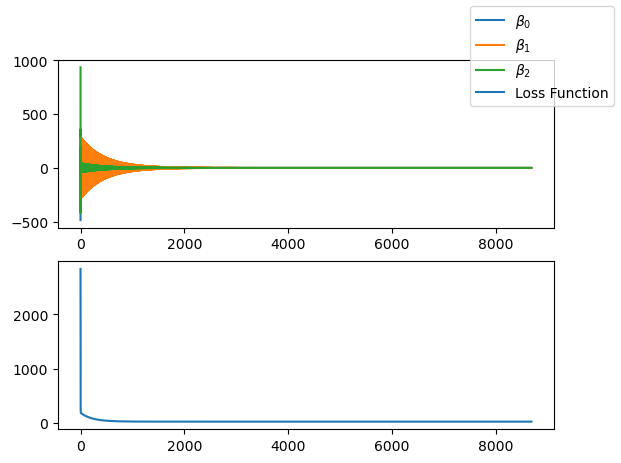

In [51]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(gradient_arr, label=["$\\beta_0$", "$\\beta_1$", "$\\beta_2$"])
axs[1].plot(f_arr, label="Loss Function")
fig.legend()

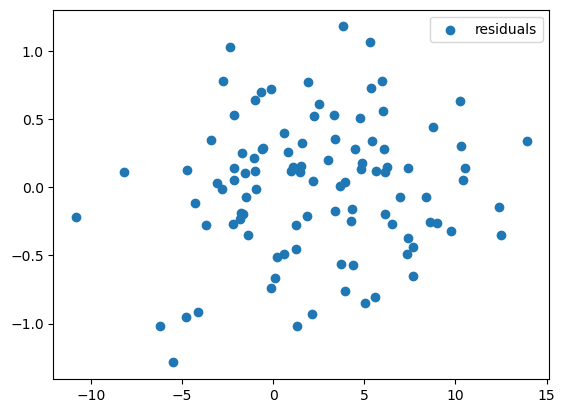

In [52]:
resid_arr = (y - X @ beta)
plt.scatter(y, resid_arr, label="residuals")
plt.legend()

In [53]:
import zipfile

* if $x=0:$ ALL

- if $x=1:$ AML

In [54]:
import pandas as pd
import numpy as np
import scipy.stats as st

# Load data and transpose the golub_df
golub_df = pd.read_csv(r"C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\golub_data\golub.csv", index_col=0).T

# Load golub_cl_df and rename index
golub_cl_df = pd.read_csv(r"C:\Users\adevr\MITx_6.419x\week_1\data_and_materials\golub_data\golub_cl.csv", index_col=0)
new_index_labels = {i: f'V{i}' for i in golub_cl_df.index}
golub_cl_df.rename(index=new_index_labels, inplace=True)

# Merge the DataFrames
df = pd.merge(golub_cl_df, golub_df, left_index=True, right_index=True)

# Sample sizes
N_ALL = 27
N_AML = 11

# Calculate sample means for ALL and AML
df.loc["Xbar_ALL", :] = df.iloc[:N_ALL, 1:].mean(axis=0)
df.loc["Xbar_AML", :] = df.iloc[N_ALL:(N_ALL+N_AML), 1:].mean(axis=0)

# Calculate sample variances for ALL and AML
df.loc["s2_ALL", :] = df.iloc[:N_ALL, 1:].var(axis=0, ddof=1)
df.loc["s2_AML", :] = df.iloc[N_ALL:(N_ALL+N_AML), 1:].var(axis=0, ddof=1)

# Calculate Welch's t-test statistics
df.loc["t_Welch", :] = (df.loc["Xbar_ALL", :] - df.loc["Xbar_AML", :]) / np.sqrt(df.loc["s2_ALL", :] / N_ALL + df.loc["s2_AML", :] / N_AML)

# Calculate degrees of freedom for Welch's t-test
df.loc["dof", :] = (df.loc["s2_ALL", :] / N_ALL + df.loc["s2_AML", :] / N_AML)**2 / (((df.loc["s2_ALL", :] / N_ALL)**2 / (N_ALL-1)) + ((df.loc["s2_AML", :] / N_AML)**2 / (N_AML-1)))

# Calculate p-values for Welch's t-test
df.loc["p-value", :] = 2 * st.t.sf(np.abs(df.loc["t_Welch", :]), df=df.loc["dof", :])

# Determine significant p-values
alpha = 0.05
df.loc["significant", :] = (df.loc["p-value", :] < alpha).astype("float64")

# Sum of significant p-values
significant_count = df.loc["significant", :].sum()
print("significant_count =", significant_count)

df

significant_count = 1078.0


,x,1,2,3,4,5,6,7,8,9,...,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051
V1,0.0,-1.457690,-0.751610,0.456950,3.135330,2.765690,2.643420,3.168850,2.888600,3.223720,...,-0.312730,-0.693420,-0.304760,-0.216610,1.089350e+00,0.046950,-0.204670,0.452310,-0.359200,-0.860790
V2,0.0,-1.394200,-1.262780,-0.096540,0.214150,-1.270450,1.014160,3.099540,2.953550,3.099540,...,-0.451470,-0.807430,-0.720560,-0.652870,2.270100e-01,0.487040,-0.078320,0.426860,-0.436330,-1.394200
V3,0.0,-1.427790,-0.090520,0.903250,2.087540,1.604330,1.704770,2.999770,2.999770,2.999770,...,-0.769070,-0.514140,-0.112960,0.273320,3.127200e-01,0.721700,-1.006150,0.675790,0.340310,-0.737660
V4,0.0,-1.407150,-0.995960,-0.071940,2.234670,1.531820,1.638450,3.288980,3.039720,3.340970,...,-0.038630,-1.175540,-0.253460,-0.354750,4.745000e-01,0.584030,-0.887480,0.315240,-0.909300,-1.190310
V5,0.0,-1.426680,-1.242450,0.032320,0.938110,1.637280,-0.360750,3.193680,3.217210,3.275150,...,-0.997060,-1.426680,-0.997060,-0.892480,2.725700e-01,0.306000,0.071750,-0.577790,-0.366630,-1.426680
V6,0.0,-1.217190,-0.692420,0.097130,2.240890,1.856970,1.734510,3.494050,3.494050,3.494050,...,-0.578400,-0.735600,-0.859560,0.031800,1.055650e+00,1.105630,-0.713760,0.513220,-0.078450,-0.606820
V7,0.0,-1.373860,-1.373860,-0.119780,3.365760,3.018470,3.365760,3.065840,3.106780,3.212340,...,0.026610,-0.296410,-0.335510,-0.311260,2.215700e-01,0.590020,-0.989000,0.898850,0.094930,-0.154560
V8,0.0,-1.368320,-0.508030,0.233810,1.978590,1.128530,0.968700,2.646220,2.032780,3.257240,...,-0.294080,-0.456330,-0.043170,-0.007670,2.211500e-01,0.307730,-0.360980,1.265490,-0.005630,0.505000
V9,0.0,-1.476490,-1.045330,0.239870,2.664680,2.170160,2.723680,2.840990,2.816500,2.840990,...,-0.561980,-0.735270,-0.389150,0.026240,9.709500e-01,0.465150,-0.990750,0.246630,-0.329670,-0.717660
V10,0.0,-1.215830,-0.812570,0.442010,-1.215830,-1.215830,-1.215830,3.454070,3.454070,3.454070,...,-0.211100,-1.215830,-0.365380,-0.350890,6.455100e-01,0.889910,-1.206680,0.385650,-0.039740,-0.722180


Holm-Bonferroni Correction:

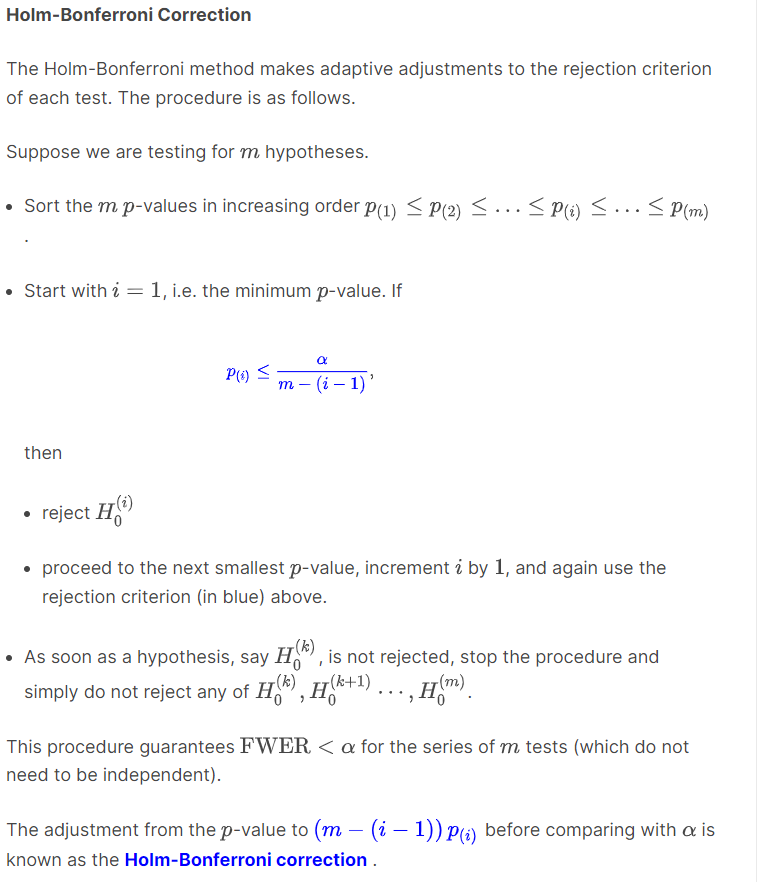

In [55]:
sorted_p = df.loc["p-value", :].dropna().sort_values()
sorted_p.rename(index={sorted_p.index[i-1]:i for i in range(1, len(sorted_p) + 1)}, inplace=True)
sorted_p

1       2.780971e-12
2       1.536819e-09
3       8.423679e-09
4       1.577363e-08
5       2.279314e-08
            ...     
3047    9.978792e-01
3048    9.983805e-01
3049    9.985468e-01
3050    9.997739e-01
3051    9.998399e-01
Name: p-value, Length: 3051, dtype: float64

In [56]:
holm_bonferroni_reject = []
alpha = 0.05
m = len(sorted_p)
for i, p in enumerate(sorted_p):
    if p <= (alpha / (m - (i-1))):
        holm_bonferroni_reject.append(1)
    else:
        break
        
rejections = (np.array(holm_bonferroni_reject).sum())
print("# of rejections in Holm-Bonferroni Correction =", rejections)

# of rejections in Holm-Bonferroni Correction = 103


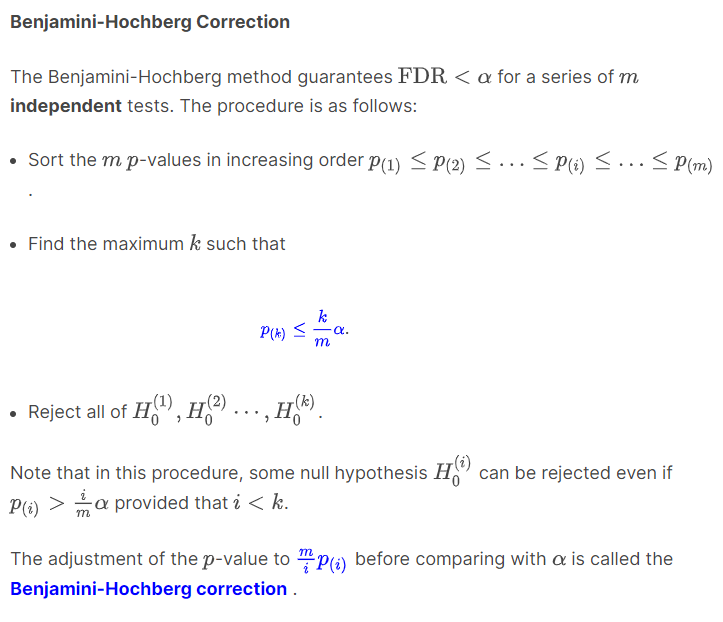

In [57]:
alpha = 0.05
m = len(sorted_p)
k = 0
k_arr = []
for k, p in enumerate(sorted_p):
    if p < (k/m)*alpha:
        k_arr.append(k)

rejections2 = (np.array(k_arr).max())
print("# of rejections in Benjamini-Hochberg Correction =", rejections2)

# of rejections in Benjamini-Hochberg Correction = 694


In [58]:
# Separate the two groups
group1 = df.loc['V1':'V27']  # ALL leukemia
group2 = df.loc['V28':'V38']  # ALM leukemia

# Initialize lists to store t-statistics and p-values
t_stats = []
p_values = []

# Perform Welch's t-test for each feature
for feature in df.columns:
    t_stat, p_val = st.ttest_ind(group1[feature], group2[feature], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_val)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature': df.columns,
    't-statistic': t_stats,
    'p-value': p_values
})

print(results_df)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


     Feature  t-statistic   p-value
0          x         -inf  0.000000
1          1    -1.759195  0.106169
2          2    -0.909858  0.380091
3          3     0.098026  0.923211
4          4     0.338963  0.736901
...      ...          ...       ...
3047    3047    -0.041362  0.967462
3048    3048    -0.316234  0.753681
3049    3049    -1.842529  0.079373
3050    3050    -0.104688  0.917497
3051    3051    -3.292583  0.006262

[3052 rows x 3 columns]


In [59]:
alpha = 0.05
(results_df["p-value"] < alpha).sum()

1079